## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# Title

## Assignment


## data source


In [61]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import opendatasets as od
import glob as glob
import cv2, os


### Data Download

In [62]:
# # this command will automatically download the dataset in about 4 minutes
# # requirments for this command: pip install opendatasets
# od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")

# # if the command is not working, you can download the dataset manually
# def create_dir(dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
# # create_dir('rice-image-dataset')

# # Data download link
# download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# # after downloading the dataset, unzip it
# # !unzip rice-image-dataset.zip


### Exploration & preprocessing

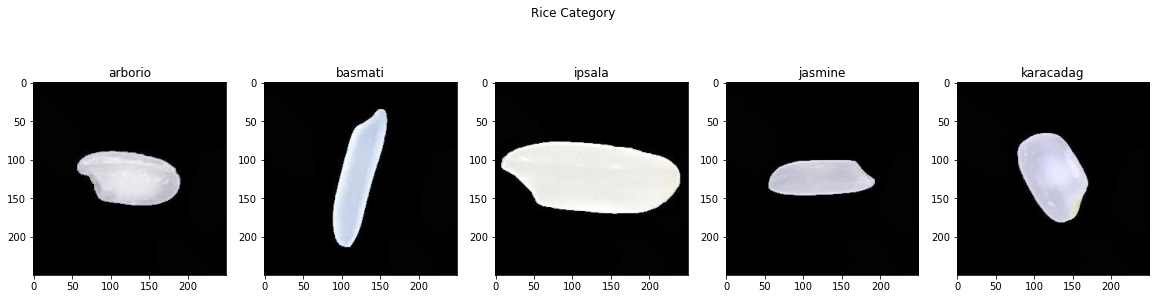

In [63]:
# Separating the categories
data_dir = 'rice-image-dataset/Rice_Image_Dataset/'
arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:10]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:10]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:10]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:10]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:10]

# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

Found 60000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


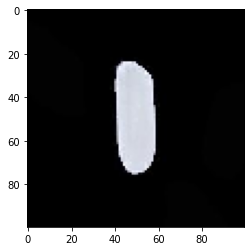

Found 15000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


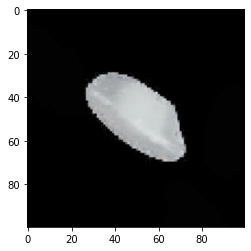

In [64]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='training',
                                                      class_mode='categorical')

for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
    break
plt.imshow(x_train[1])
plt.show()

test_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='validation',
                                                      class_mode='categorical')
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)
    break
plt.imshow(x_test[1])
plt.show()
                                                      
                                            

tried three difference target sizes, 250, which was the standard image size, 200 and 100,
ultimately 100 still gives enough detail for good training, lower is not recommended, as the resolutions becomes questionable.

### Baseline model

In [65]:
# reshape into 2d array
x_train.shape,x_test.shape

#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input

x_test = x_test/255.0
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))


print(x_train2.shape, x_test2.shape)

(20, 30000) (20, 30000)


For the baseline I have chooses to pick Random forest classification model, as i knew that This algorithm is increasingly being applied to satellite and aerial image classification. So i have chosen this model for its uses in image classification. just to test if the model is working for this instance as well.

In [66]:
# sklearn create a Regression model for image classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

model = RandomForestClassifier()
fit = model.fit(x_train2, y_train)

y_pred = model.predict(x_train2)
y_pred

print(classification_report(y_pred, y_test))


0.2
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.40      0.50      0.44         4
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

   micro avg       0.20      0.20      0.20        20
   macro avg       0.23      0.19      0.20        20
weighted avg       0.24      0.20      0.21        20
 samples avg       0.20      0.20      0.20        20



### Fully-connected neural network model

In [70]:
# neural network
neural = keras.models.Sequential()
# add input layer
neural.add(keras.layers.InputLayer(input_shape=(100,100,3), name='input'))
neural.add(keras.layers.Flatten(name='flatten'))
neural.add(keras.layers.Dense(units=64, activation='relu', name='dense3'))
neural.add(keras.layers.Dense(units=32, activation='relu', name='dense4'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='dense5'))

# output layer
neural.add(keras.layers.Dense(units=5, activation='softmax', name = 'output'))
neural.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense1 (Dense)              (None, 256)               7680256   
                                                                 
 dense2 (Dense)              (None, 128)               32896     
                                                                 
 dense3 (Dense)              (None, 64)                8256      
                                                                 
 dense4 (Dense)              (None, 32)                2080      
                                                                 
 dense5 (Dense)              (None, 16)                528       
                                                                 
 output (Dense)              (None, 5)               

In [71]:
# compile
neural.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [72]:
# fit 
history_neural = neural.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_neural.history.keys()

Epoch 1/10
100/100 [==============================] - 16s 139ms/step - loss: 0.7369 - categorical_accuracy: 0.7155 - auc_3: 0.9326 - val_loss: 0.4196 - val_categorical_accuracy: 0.8600 - val_auc_3: 0.9760
Epoch 2/10
100/100 [==============================] - 13s 131ms/step - loss: 0.2729 - categorical_accuracy: 0.9050 - auc_3: 0.9891 - val_loss: 0.2444 - val_categorical_accuracy: 0.9100 - val_auc_3: 0.9908
Epoch 3/10
100/100 [==============================] - 12s 115ms/step - loss: 0.1977 - categorical_accuracy: 0.9400 - auc_3: 0.9919 - val_loss: 0.1681 - val_categorical_accuracy: 0.9460 - val_auc_3: 0.9958
Epoch 4/10
100/100 [==============================] - 11s 112ms/step - loss: 0.1956 - categorical_accuracy: 0.9350 - auc_3: 0.9930 - val_loss: 0.3253 - val_categorical_accuracy: 0.8500 - val_auc_3: 0.9859
Epoch 5/10
100/100 [==============================] - 11s 114ms/step - loss: 0.1983 - categorical_accuracy: 0.9325 - auc_3: 0.9928 - val_loss: 0.1047 - val_categorical_accuracy: 0.

dict_keys(['loss', 'categorical_accuracy', 'auc_3', 'val_loss', 'val_categorical_accuracy', 'val_auc_3'])

In [ ]:
plt.plot(history_neural.history['loss'], marker='go', c='red', label='loss')
plt.plot(history_neural.history['val_loss'], marker='g-', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['categorical_accuracy'], marker='go', c='red', label='acc')
plt.plot(history_neural.history['val_categorical_accuracy'], marker='g-', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['auc'], marker='go', c='red', label='auc')
plt.plot(history_neural.history['val_auc'], marker='g-', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


### Regularized convolutional neural network model

In [ ]:
# convolutional neural network
cov = keras.models.Sequential()

cov.add(keras.layers.InputLayer(input_shape=(100,100, 3),name='input'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_1'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_2'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

cov.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation=keras.activations.relu, name='conv_3'))
cov.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation=keras.activations.relu, name='conv_4'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))

cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_5'))
cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_6'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_3'))

cov.add(keras.layers.Conv2D(filters = 96, kernel_size=(3,3), activation=keras.activations.relu, name='conv_8'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_4'))

cov.add(keras.layers.Flatten(name='flatten'))
cov.add(keras.layers.Dense(units=64, activation=keras.activations.relu, name='hidden_1'))
cov.add(keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output'))

cov.summary()

In [ ]:
# compile
cov.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [ ]:
# fit 
history_cov = cov.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_cov.history.keys()

In [ ]:
# evaluate

plt.plot(history_cov.history['loss'], marker='go', c='red', label='loss')
plt.plot(history_cov.history['val_loss'], marker='g-', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_cov.history['categorical_accuracy'], marker='go', c='red', label='acc')
plt.plot(history_cov.history['val_categorical_accuracy'], marker='g-', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


plt.plot(history_cov.history['auc'], marker='go', c='red', label='auc')
plt.plot(history_cov.history['val_auc'], marker='g-', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Summary

Baseline: 

Neural network: 

Convolution neural network

### improvements to be made

fine tune the model etc etc etc